# ANÁLISIS EXPLORATORIO DE CERVEZAS ARTESANAS NACIONALES

A partir de los datos obtenidos y preprocesados sobre una base de datos de cerevezas artesanas de origen español, vamos a hacer un estudio del que pretendemos sacer información sobre cómo es la cerveza artesana nacional.
Para ello, estudiaremos los diferentes parámetros y sus relaciones de modo que podamos extraer conclusiones.

In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = "terrain"
palette = plt.get_cmap('terrain')
import seaborn as sns
import plotly.graph_objs as go

In [9]:
# leemos el fichero de datos
df=pd.read_csv("data/soloartesanas_limpio.csv", sep=";")
df.head()

,id,color,name,brand,description,image,Estilo,Graduación,Fermentación,IBU,Lúpulos,European Brewing Convention (EBC),Maltas,Temperatura de consumo,Grano,Población,Provincia,Comunidad Autónoma,País
0,2,rubia,Alegría & Boris Brew Ipanosuarus Rex,Cervezas Alegría,"\nUna doble IPA rubia, potente y seca. Elabora...",https://static3.soloartesanas.es/3333-large_de...,Imperial / Double IPA,8.2,Ale,60.0,NaN,NaN,NaN,NaN,NaN,Massanassa,Valencia,Valencia,España
1,3,rubia,Roy The Bull Mango,Roy The Bull,\nAquí está la primera cerveza de Roy The Bull...,https://static3.soloartesanas.es/3332-large_de...,Fruit Beer,6.0,Ale,38.0,Citra,NaN,NaN,NaN,NaN,Vigo,Pontevedra,Galicia,España
2,4,rubia,Marijuana,Marijuana,\nLa única cerveza cerveza artesana que podrás...,https://static1.soloartesanas.es/3223-large_de...,Pale Ale,5.7,Ale,999.0,NaN,NaN,NaN,NaN,NaN,Hoyoasero,Ávila,Castilla y León,España
3,5,rubia,Arriaca Trigo (lata),Cervezas Arriaca,\nUna cerveza de trigo muy afrutada y ligera. ...,https://static2.soloartesanas.es/3449-large_de...,Weizen - Weissbier,4.7,Ale,999.0,NaN,NaN,NaN,NaN,NaN,Yunquera de Henares,Guadalajara,Castilla-La Mancha,España
4,6,rubia,Bertus White IPA,Bertus,"\nCerveza de estilo IPA elaborada con trigo, j...",https://static2.soloartesanas.es/3201-large_de...,White IPA,6.6,Ale,50.0,NaN,"8,1",NaN,NaN,NaN,Rubí,Barcelona,Cataluña,España


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 427 non-null    int64  
 1   color                              427 non-null    object 
 2   name                               427 non-null    object 
 3   brand                              427 non-null    object 
 4   description                        427 non-null    object 
 5   image                              427 non-null    object 
 6   Estilo                             427 non-null    object 
 7   Graduación                         427 non-null    float64
 8   Fermentación                       427 non-null    object 
 9   IBU                                427 non-null    float64
 10  Lúpulos                            98 non-null     object 
 11  European Brewing Convention (EBC)  101 non-null    object 

## Analizamos el origien de estas cervezas
Son todas españolas, pero queremos saber en qué provincias y comunidades se registran más marcas

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


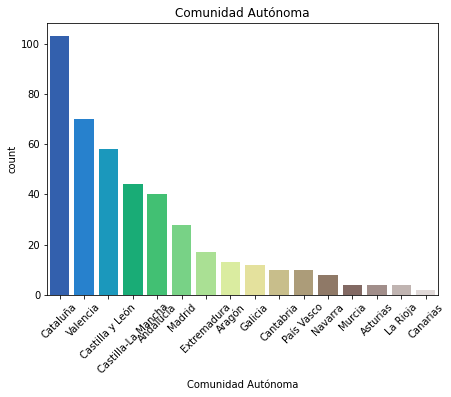

In [19]:
# Por comunidades autónomas. Ordenadas

plt.figure(figsize=(7,5))
sns.countplot(df['Comunidad Autónoma'], 
              palette="terrain",
              order = df['Comunidad Autónoma'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Comunidad Autónoma");


In [21]:
# Tomando el top7 de comunidades ¿cómo es el reparto por provincias?
#df_7CCAA=df[df['Comunidad Autónoma'].value_counts()]

df.sort_values(['Comunidad Autónoma'].value_counts().index, ascending=False).groupby('Comunidad Autónoma').head(10)

AttributeError: 'list' object has no attribute 'value_counts'